In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [1]:
from google.colab import files

# Upload ZIP file
uploaded = files.upload()

Saving creditcardfraud.zip to creditcardfraud.zip


In [2]:
import zipfile
import os

# Replace 'your_file.zip' with the name of your uploaded ZIP file
zip_file_name = 'creditcardfraud.zip'

# Extract the ZIP file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('extracted_files')  # Extract to a folder called 'extracted_files'

In [5]:
#Load dataset
df = pd.read_csv('/content/extracted_files/creditcard.csv')

**How many rows and columns are in the dataset?**

In [6]:
rows, columns = df.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")


Number of rows: 284807
Number of columns: 31


**What are the column names and their data types?**

In [7]:
print(df.dtypes)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


**Are there any missing or null values in the dataset?**

In [8]:
# Check for missing values in the dataset
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


**How many transactions are fraudulent, and how many are legitimate?**

In [9]:
# Assuming 1 indicates fraudulent and 0 indicates legitimate
fraud_counts = df['Class'].value_counts()

# Print the counts
print(fraud_counts)

# Optionally, display the counts with labels
print(f"Legitimate transactions: {fraud_counts.get(0, 0)}")
print(f"Fraudulent transactions: {fraud_counts.get(1, 0)}")


Class
0    284315
1       492
Name: count, dtype: int64
Legitimate transactions: 284315
Fraudulent transactions: 492


**What percentage of transactions are fraudulent?**

Percentage of fraudulent transactions: 0.17%


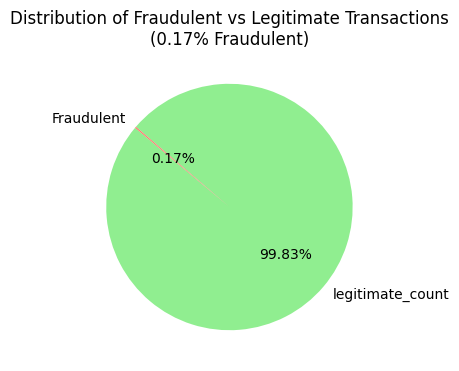

In [40]:
# Count the occurrences of fraudulent (1) and legitimate (0) transactions
fraudulent_count = df['Class'].value_counts().get(1, 0)
legitimate_count = df['Class'].value_counts().get(0, 0)
total_transactions = len(df)

# Calculate the percentage of fraudulent transactions
fraudulent_percentage = (fraudulent_count / total_transactions) * 100

# Print the percentage of fraudulent transactions
print(f"Percentage of fraudulent transactions: {fraudulent_percentage:.2f}%")

# Create a pie chart for the transaction distribution
transaction_counts = [legitimate_count, fraudulent_count]
labels = ['legitimate_count', 'Fraudulent']

# Plot the pie chart
plt.figure(figsize=(4, 4))
plt.pie(transaction_counts, labels=labels, autopct='%2.2f%%', colors=['lightgreen', 'salmon'], startangle=140)

# Add title
plt.title(f'Distribution of Fraudulent vs Legitimate Transactions\n({fraudulent_percentage:.2f}% Fraudulent)')

# Display the pie chart
plt.show()


 **What are the minimum, maximum, mean, and median values for
numerical columns like Amount?**

In [11]:
amount_stats = {
    'Minimum': df['Amount'].min(),
    'Maximum': df['Amount'].max(),
    'Mean': df['Amount'].mean(),
    'Median': df['Amount'].median()
}

# Print the results
for stat, value in amount_stats.items():
    print(f"{stat}: {value}")


Minimum: 0.0
Maximum: 25691.16
Mean: 88.34961925093133
Median: 22.0


**What is the maximum transaction amount in the dataset, and is it
fraudulent?**

In [13]:
# Find the maximum transaction amount
max_amount = df['Amount'].max()

# Find the row corresponding to the maximum amount
max_transaction = df[df['Amount'] == max_amount]

# Check if it is fraudulent
is_fraudulent = max_transaction['Class'].iloc[0]

# Print the results
print(f"Maximum transaction amount: {max_amount}")
print(f"Is it fraudulent? {'Yes' if is_fraudulent == 1 else 'No'}")


Maximum transaction amount: 25691.16
Is it fraudulent? No


**Can we create a bar chart showing the count of fraudulent vs.
legitimate transactions?**

<ipython-input-14-c5215421306a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transaction_counts.index, y=transaction_counts.values, palette="viridis")


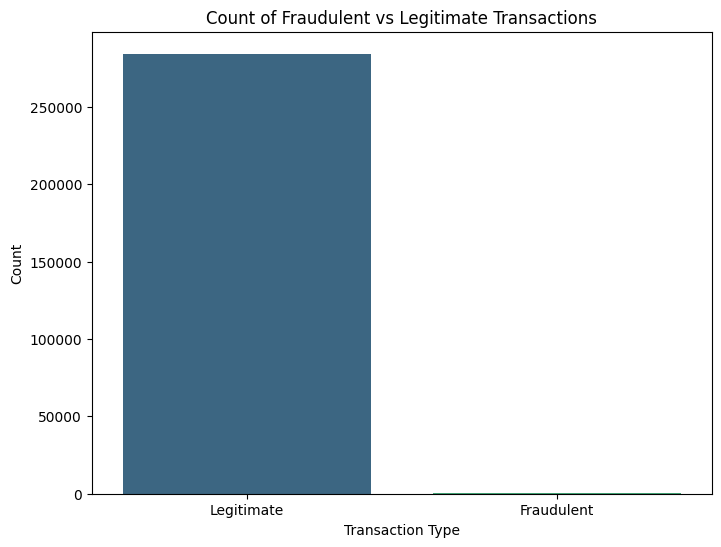

In [14]:
import seaborn as sns

# Assuming 1 = Fraudulent, 0 = Legitimate
transaction_counts = df['Class'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=transaction_counts.index, y=transaction_counts.values, palette="viridis")

# Add labels and title
plt.xticks(ticks=[0, 1], labels=['Legitimate', 'Fraudulent'])
plt.ylabel('Count')
plt.xlabel('Transaction Type')
plt.title('Count of Fraudulent vs Legitimate Transactions')

# Display the plot
plt.show()


**What does the histogram of transaction amounts look like?**

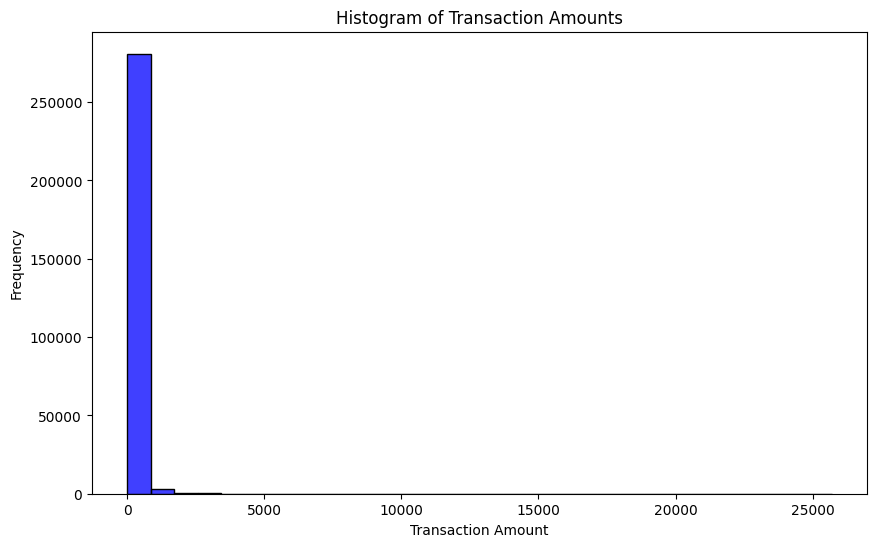

In [20]:
# Plot a histogram for the 'Amount' column
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=30, kde=False, color='blue')

# Add labels and title
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Transaction Amounts')

# Display the plot
plt.show()


**Can we use a heatmap to visualize the correlation between numerical
features?**

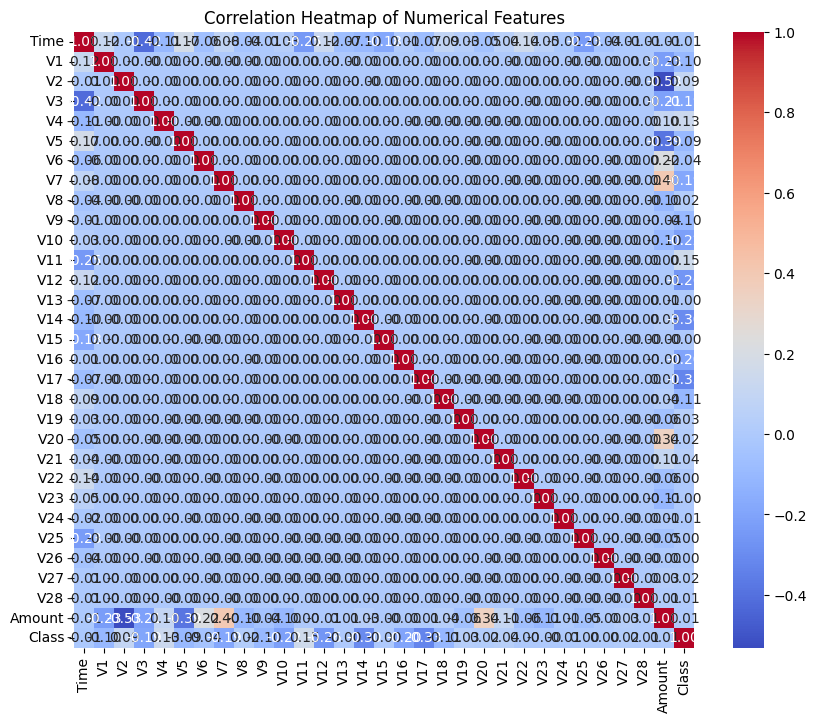

In [24]:
# Compute the correlation matrix for numerical columns
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Add title
plt.title('Correlation Heatmap of Numerical Features')

# Display the plot
plt.show()
